In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from matplotlib import pyplot as plt
import cv2
import pathlib

In [7]:
gray = cv2.imread('./notation.png')
gray = gray[np.newaxis]
gray = np.float32(gray)
gray = cv2.normalize(gray, None, 0, 1, cv2.NORM_MINMAX)
gray.shape

(1, 600, 600, 3)

In [10]:
model = keras.Sequential([
    layers.Conv2D(1, 32, padding='same', use_bias=False, kernel_initializer='Ones')
])
lay = layers.Conv2D(1, 32, padding='same', use_bias=False, kernel_initializer='Ones')
model.compile()

In [13]:
pred = model.predict(gray)
pred_img = pred[0]
pred_img.shape

other_pred = lay(gray)
other_pred = other_pred[0]
other_pred.shape

TensorShape([600, 600, 1])

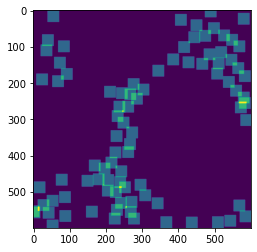

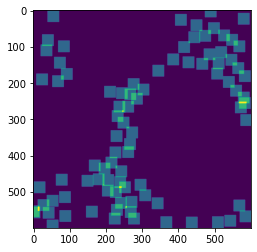

In [15]:
plt.imshow(other_pred)
plt.show()

plt.imshow(pred_img)
plt.show()

In [7]:
pixels = {}
for row in pred_img:
    for val in row:
        if val[0] not in pixels:
            pixels[val[0]] = 1

        else:
            pixels[val[0]] += 1

pixels


{0.0: 212007, 1.0: 129080, 2.0: 17950, 3.0: 928, 4.0: 35}

In [8]:
saved = cv2.normalize(pred_img, None, 0, 255, cv2.NORM_MINMAX)
cv2.imwrite('./TargetNotation.png', saved)

True